# K-Means


The pinguins are back! Use K-Means to find groups from the penguins dataset. Do they correspond to the true labels?

In [3]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [4]:
import pandas as pd
import seaborn as sns 
from palmerpenguins import load_penguins
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.optimize import linear_sum_assignment
sns.set_style('whitegrid')

In [5]:
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [6]:
penguins = penguins.dropna()

In [7]:
X = penguins[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]

In [8]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

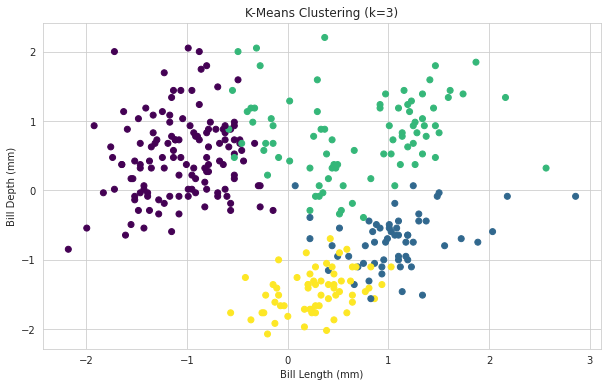

In [9]:
#Make a plot where the color is the label assigned by the clustering
# train K-means model with optimal k=3
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(X)

# assign cluster labels to data points
labels = kmeans.labels_

# create scatter plot with color representing cluster label
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.title('K-Means Clustering (k=3)')
plt.show()


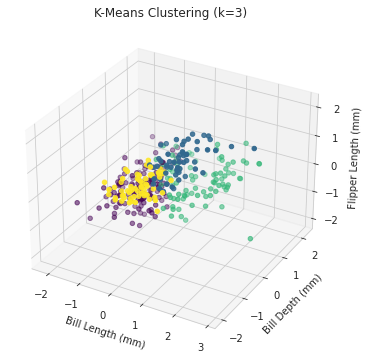

In [10]:
#Make a 3D plot where the color is the label assigned by the clustering
from mpl_toolkits.mplot3d import Axes3D

# train K-means model with optimal k=3
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(X)

# assign cluster labels to data points
labels = kmeans.labels_

# create 3D scatter plot with color representing cluster label
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='viridis')
ax.set_xlabel('Bill Length (mm)')
ax.set_ylabel('Bill Depth (mm)')
ax.set_zlabel('Flipper Length (mm)')
ax.set_title('K-Means Clustering (k=3)')
plt.show()


In [11]:
#TODO To which label each class correspond? Search about scipy linear_sum_assignment
#It is an optimization problem.
#Show the table
# use linear_sum_assignment to find optimal label assignment
y_true = penguins['species'].astype('category').cat.codes.values
n_classes = len(np.unique(y_true))
cost_matrix = np.zeros((n_classes, n_classes))
for i in range(n_classes):
    for j in range(n_classes):
        cost_matrix[i, j] = -np.sum((labels == i) & (y_true == j))
row_ind, col_ind = linear_sum_assignment(cost_matrix)

# create table of label assignments
table = pd.DataFrame(columns=['Cluster Label', 'True Label'])
for i in range(n_classes):
    table = table.append({'Cluster Label': i, 'True Label': col_ind[i]}, ignore_index=True)

print(table)


  Cluster Label True Label
0             0          0
1             1          2
2             2          1


/tmp/ipykernel_1299/4281122294.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Cluster Label': i, 'True Label': col_ind[i]}, ignore_index=True)
/tmp/ipykernel_1299/4281122294.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Cluster Label': i, 'True Label': col_ind[i]}, ignore_index=True)
/tmp/ipykernel_1299/4281122294.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Cluster Label': i, 'True Label': col_ind[i]}, ignore_index=True)


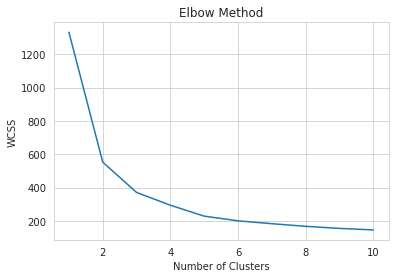

In [12]:
#TODO Do the elbow method for different k's
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


Iteration 1: loss = 694.9156034947603
Iteration 2: loss = 694.6699853372477
Iteration 3: loss = 695.0146879398613
Iteration 4: loss = 717.1366470553147
Iteration 5: loss = 709.3513709713136
Iteration 6: loss = 704.5892358741003
Iteration 7: loss = 694.8886657702604
Iteration 8: loss = 695.0146879398612
Iteration 9: loss = 695.7607454486881
Iteration 10: loss = 694.8886657702604
Iteration 11: loss = 717.245855280059
Iteration 12: loss = 717.2606111485856
Iteration 13: loss = 695.0022265894007
Iteration 14: loss = 710.5308617627717
Iteration 15: loss = 711.6580681417606
Iteration 16: loss = 717.6219966337736
Iteration 17: loss = 694.8717684355624
Iteration 18: loss = 694.7496132914357
Iteration 19: loss = 695.0082922162046
Iteration 20: loss = 709.302871279838
Iteration 21: loss = 695.0960583185046
Iteration 22: loss = 694.8651986352266
Iteration 23: loss = 694.9156034947603
Iteration 24: loss = 694.9351390164285
Iteration 25: loss = 695.0045921433688
Iteration 26: loss = 717.25958430361

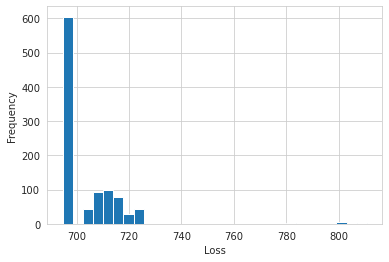

In [13]:
#TODO train 1000 models, with random initialization. Plot the results of the losses


# generate some sample data
np.random.seed(42)
X = np.random.randn(1000, 2)

# train 1000 models, with random initialization, and record their losses
losses = []
best_loss = float('inf')
best_iteration = None

for i in range(1000):
    kmeans = KMeans(n_clusters=4, init='random', n_init=1, random_state=i)
    kmeans.fit(X)
    losses.append(kmeans.inertia_)
    loss = kmeans.inertia_
    if loss < best_loss:
        best_loss = loss
        best_iteration = i
    print(f'Iteration {i+1}: loss = {loss}')

print(f'\nBest loss = {best_loss} achieved in iteration {best_iteration+1}.')

# plot the histogram of the losses
plt.hist(losses, bins=30)
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.show()


Iteration 1: loss = 892.5997096755339
Iteration 2: loss = 904.8096986148078
Iteration 3: loss = 904.9736252144024
Iteration 4: loss = 892.6904975593104
Iteration 5: loss = 904.9758620215725
Iteration 6: loss = 904.9803781763178
Iteration 7: loss = 891.3137767415507
Iteration 8: loss = 904.8265823445361
Iteration 9: loss = 909.2941190970497
Iteration 10: loss = 905.2946436747092
Iteration 11: loss = 905.165961004128
Iteration 12: loss = 891.3137767415506
Iteration 13: loss = 914.9566291984393
Iteration 14: loss = 891.3137767415506
Iteration 15: loss = 892.7811680551198
Iteration 16: loss = 909.2867209511978
Iteration 17: loss = 904.9084032673767
Iteration 18: loss = 891.1564574622141
Iteration 19: loss = 891.3154164477086
Iteration 20: loss = 892.3903580915719
Iteration 21: loss = 892.6799398189253
Iteration 22: loss = 904.8829165756445
Iteration 23: loss = 904.9736252144022
Iteration 24: loss = 903.268708566239
Iteration 25: loss = 892.1125940040948
Iteration 26: loss = 905.11035344849

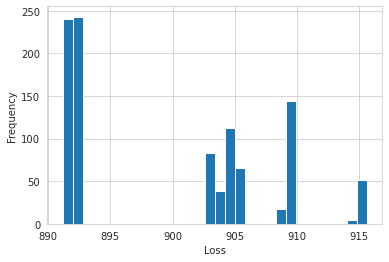

In [14]:
#TODO train 1000 models, with a better initialization. Plot the results of the losses

# generate some sample data
np.random.seed(42)
X = np.random.randn(1000, 2)

# train 1000 models, with k-means++ initialization, and record their losses
losses = []
best_loss = float('inf')
best_iteration = None

for i in range(1000):
    kmeans = KMeans(n_clusters=3, init='k-means++', n_init=1, max_iter=300, random_state=i)
    kmeans.fit(X)
    losses.append(kmeans.inertia_)
    loss = kmeans.inertia_
    if loss < best_loss:
        best_loss = loss
        best_iteration = i
    print(f'Iteration {i+1}: loss = {loss}')

print(f'\nBest loss = {best_loss} achieved in iteration {best_iteration+1}.')

# plot the histogram of the losses
plt.hist(losses, bins=30)
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.show()



We have already seen the K-Means class. We know that it can help us to reduce dimensionality and understand how the data behave. We can use it for finding groups and classify them. Now, we are going to use it to do image segmentation.  

What do you think are the data points?  
How can we evaluate each point?  
How is different an image from a normal matrix of data?  

We are going to use RGB images. They have three channels and we must take those into account while computing the groups.

<img src="three_d_array.png" alt="three_d_array" width="300"/>

This time, you will have to implement K-Means by hand, do not use the sklearn. How can you define the centroids?

In [15]:
#Import libraries
from skimage import io
from skimage import color

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
%matplotlib inline
import requests

In [16]:
#Download image. Feel free to change the image. Remember that we are working with RGB images.
url = "https://www.rainforest-alliance.org/wp-content/uploads/2021/06/poison-dart-frog-thumb-1-400x400.jpg"
img_data = requests.get(url).content
with open('image.jpg', 'wb') as handler:
    handler.write(img_data)
img = io.imread("image.jpg")

(-0.5, 399.5, 399.5, -0.5)

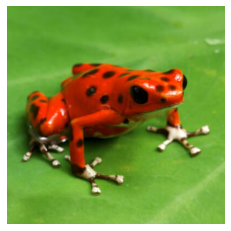

In [17]:
#Show image
plt.imshow(img)
plt.axis("off")

In [18]:
#Check the shape of the image. If there are more or less channels, we might have an image in another format
img.shape

(400, 400, 3)

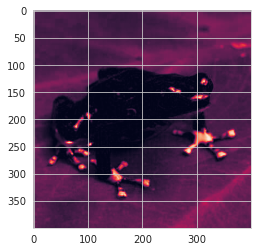

In [19]:
#Show just the blue channel
plt.imshow(img[:,:,2])

In [20]:
#TODO Feel free to change the method definition and documentation, you can create the method that you need

#Method for computing the new centroids. The parameters are:
#     - centroids. Current centroids.
#     - data. data[0] will contain the image
#             data[1] will contain the current label or centroid
# Returns the new centroids. The data and labels do not change.

    # For each centroid, calculate the new center by finding the mean of the data points in each channel

def compute_centroids(centroids, data):
    new_centroids = {}
    centroid_pixels = {}
    for i, centroid in enumerate(centroids.values()):
        mask = data[1] == i
        pixels = data[0][mask]
        centroid_pixels[i] = pixels
        new_centroids[i] = np.mean(pixels, axis=0)
    return new_centroids, centroid_pixels




In [21]:
#TODO Feel free to change the method definition and documentation, you can create the method that you need

#Method for assigning the points to a new centroid. The parameters are:
#     - centroids. Current centroids.
#     - data. data[0] will contain the image
#             data[1] will contain the current label or centroid
# Returns the new labels. The points are assigned based on Euclidean distance.

    # Assign each pixel to the closest centroid using the new centroids
def assign(centroids, data):
    labels = np.zeros((data[0].shape[0], data[0].shape[1]))
    for i in range(data[0].shape[0]):
        for j in range(data[0].shape[1]):
            distances = distances = np.linalg.norm(data[0][i, j, :] - np.array(list(centroids.values())), axis=1, keepdims=True)
            labels[i, j] = np.argmin(distances)
    return labels

In [22]:
#TODO Feel free to change the method definition and documentation, you can create the method that you need

#Method that implements K-Means. The parameters are:
#     - k. The problem with K-Means is that it needs a hyperparameter k, selected by the user.
#     - image. 
#Returns a segmented image.
def k_means(k, image):

    centroids = {i: np.random.randint(255, size=(3,)) for i in range(k)}# Randomly assigned centroids
    
    labels = np.zeros((image.shape[0], image.shape[1]))
    
    data = (image, labels)
    while True: #Run the K-Means algorithm until convergence
        new_centroids, centroid_pixels = compute_centroids(centroids, data)# iterate the new centroids
       
        new_labels = assign(new_centroids, data) # reassiging the new lables to the closest new centroid
        
        if np.array_equal(new_labels, labels):# when there is no changes then the algorithm converge
            break
        
        labels = new_labels# when is not the same assign new labels and new centroids
        centroids = new_centroids
    
    new_i = np.zeros_like(image)# to get the segment image map the lables with the centroids
    for i in range(k):
        mask = labels == i
        new_i[mask] = new_centroids[i]
    return new_i

In [23]:
#Get 8 new images, with a different number of clusters
images = []
for k in range(1,9):
    images.append(k_means(k,img))

/home/felipe/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/felipe/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


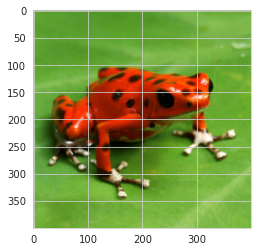

In [34]:
import cv2
 
# Read in the image
image = cv2.imread('image.jpg')
 
# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
 
plt.imshow(image)

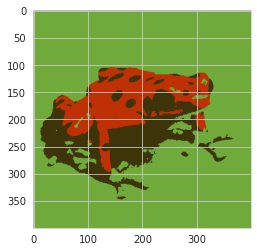

In [31]:
pixels = image.reshape((-1,3))# Reshaping the image into a 2D array for (RGB)

pixels = np.float32(pixels)# Convert to float type

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.75)# accuracy of 75%
 
k = 3 # number of clusters

vals, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
 
centers = np.uint8(centers) # converting it into uint-8
segmented_data = centers[labels.flatten()]
 
segmented_image = segmented_data.reshape((image.shape))# reshape for the original shape
 
plt.imshow(segmented_image)

In [32]:
def print_images(imagenes,img):
    #Configuration of the plot
    plt.figure(figsize=(15, 10))
    plt.subplot(np.ceil(len(imagenes)/3).astype(int), 3, 1)

    #Show original image
    plt.imshow(img)
    plt.title("Original Image")
    plt.axis("off")

    #Show the segmented images
    for idx in range(len(imagenes)):
        plt.subplot((np.ceil(len(imagenes)/3)).astype(int), 3, 2 + idx)
        plt.imshow(imagenes[idx].astype('uint8'))
        plt.title(f"{idx+1} Colors")
        plt.axis("off")
    plt.show()

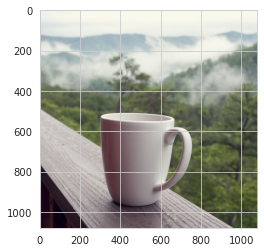

In [ ]:
import cv2
 
# Read in the image
image = cv2.imread('1.jpg')
 
# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
 
plt.imshow(image)

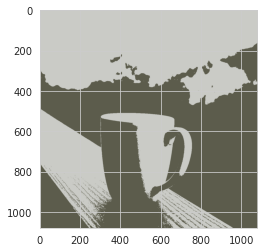

In [ ]:
pixels = image.reshape((-1,3))# Reshaping the image into a 2D array for (RGB)

pixels = np.float32(pixels)# Convert to float type

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.75)# accuracy of 75%
 
k = 2 # number of clusters

vals, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
 
centers = np.uint8(centers) # converting it into uint-8
segmented_data = centers[labels.flatten()]
 
segmented_image = segmented_data.reshape((image.shape))# reshape for the original shape
 
plt.imshow(segmented_image)

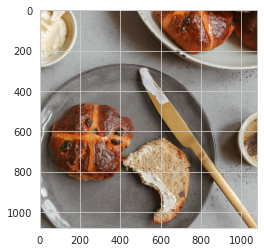

In [ ]:
import cv2
 
# Read in the image
image = cv2.imread('2.jpg')
 
# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
 
plt.imshow(image)

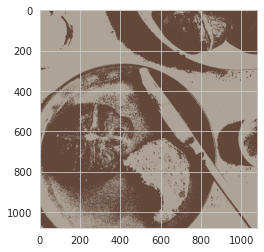

In [ ]:
pixels = image.reshape((-1,3))# Reshaping the image into a 2D array for (RGB)

pixels = np.float32(pixels)# Convert to float type

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.75)# accuracy of 75%
 
k = 2 # number of clusters

vals, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
 
centers = np.uint8(centers) # converting it into uint-8
segmented_data = centers[labels.flatten()]
 
segmented_image = segmented_data.reshape((image.shape))# reshape for the original shape
 
plt.imshow(segmented_image)

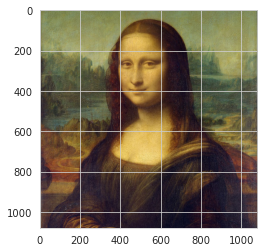

In [ ]:
import cv2
 
# Read in the image
image = cv2.imread('3.jpg')
 
# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
 
plt.imshow(image)

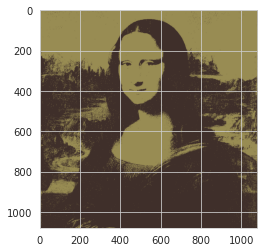

In [ ]:
pixels = image.reshape((-1,3))# Reshaping the image into a 2D array for (RGB)

pixels = np.float32(pixels)# Convert to float type

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.75)# accuracy of 75%
 
k = 2 # number of clusters

vals, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
 
centers = np.uint8(centers) # converting it into uint-8
segmented_data = centers[labels.flatten()]
 
segmented_image = segmented_data.reshape((image.shape))# reshape for the original shape
 
plt.imshow(segmented_image)